# ***Predicting conversion rate with ML algorithms / Recommendations to the marketing team***

# **Loading libraries and importing dataset**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import sklearn
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
pd.options.mode.chained_assignment = None 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('conversion_data.csv')

# **Dataset cleaning**

In [ ]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
df.shape

(316200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [ ]:
df.isnull().sum(axis = 0)

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [ ]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


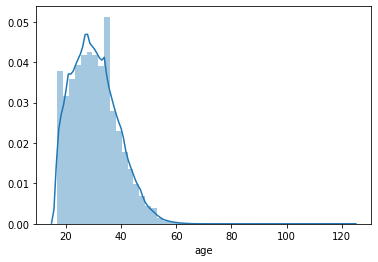

In [ ]:
sns.distplot(df.age)

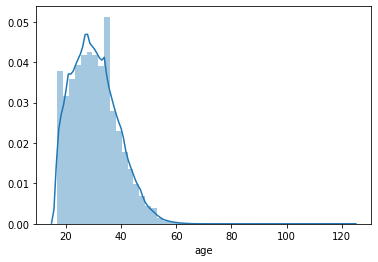

In [ ]:
sns.distplot(df.age)

In [ ]:
new_df = new_df = df[(df.age < df.age.mean() + 3*df.age.std()) & (df.age > df.age.mean()- 3*df.age.std())]

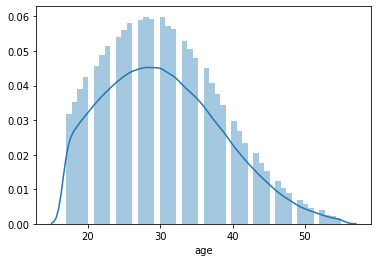

In [ ]:
sns.distplot(new_df.age)

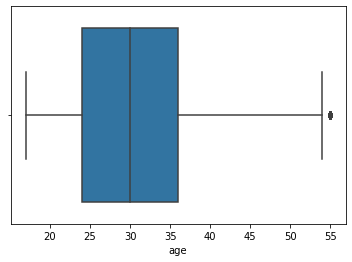

In [ ]:
sns.boxplot(new_df.age)

In [ ]:
new_df.describe()

,age,new_user,total_pages_visited,converted
count,315044.000000,315044.000000,315044.000000,315044.000000
mean,30.466674,0.685460,4.873805,0.032354
std,8.106238,0.464333,3.342794,0.176939
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,55.000000,1.000000,29.000000,1.000000


In [ ]:
new_df.isnull().sum(axis = 0)

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

# **Dataset exploration**

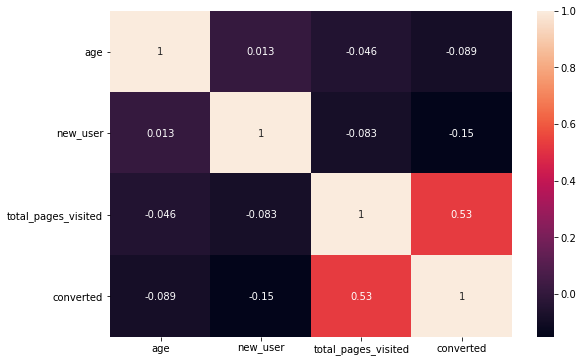

In [ ]:
corr = new_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax)

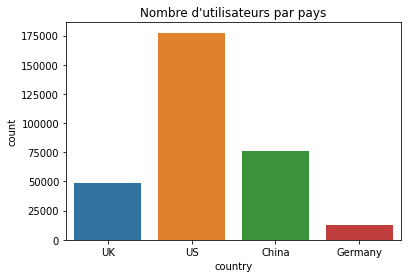

In [ ]:
ax = sns.countplot(new_df.country, data=new_df)
ax.set_title("Nombre d'utilisateurs par pays")
plt.show()

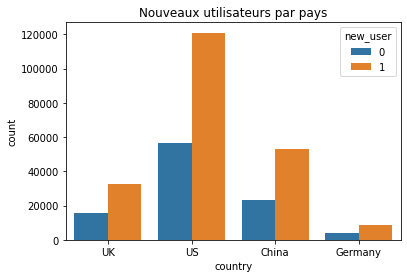

In [ ]:
ax = sns.countplot(x="country", hue="new_user", data=new_df)
ax.set_title("Nouveaux utilisateurs par pays")
plt.show()

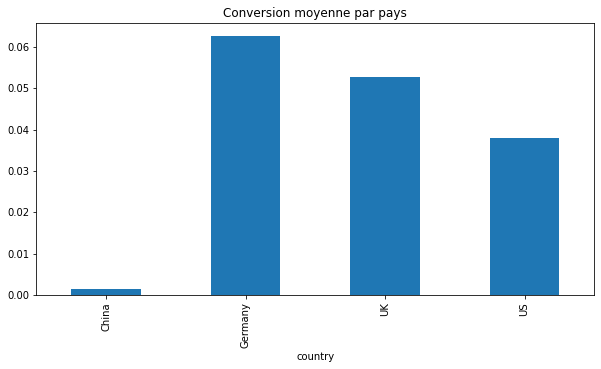

In [ ]:
ax = new_df.groupby("country")["converted"].mean().plot(kind="bar", figsize=(10,5))
ax.set_title("Conversion moyenne par pays")
plt.show()

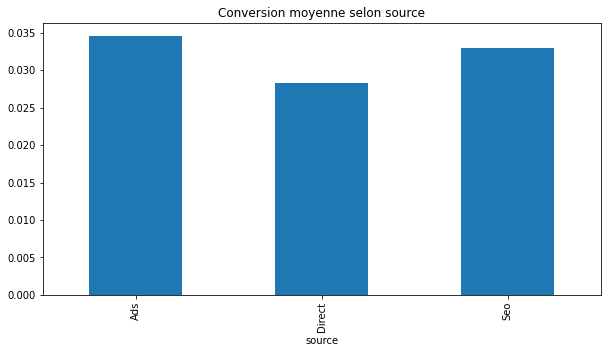

In [ ]:
ax = new_df.groupby("source")["converted"].mean().plot(kind="bar", figsize=(10,5))
ax.set_title("Conversion moyenne selon source")
plt.show()

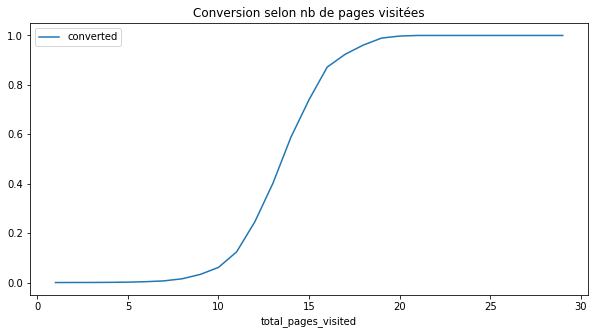

In [ ]:
ax = new_df.groupby('total_pages_visited')[['converted']].mean().plot(kind="line", figsize=(10,5))
ax.set_title("Conversion selon nb de pages visitées")
plt.show()

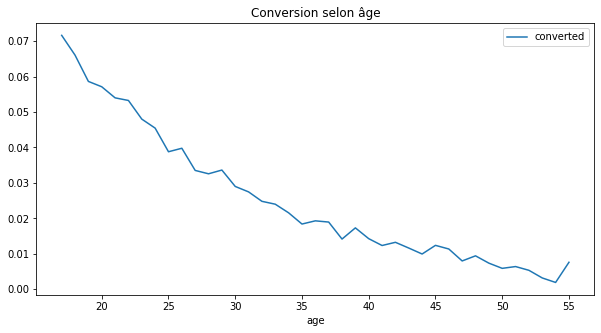

In [ ]:
ax = new_df.groupby('age')[['converted']].mean().plot(kind="line", figsize=(10,5))
ax.set_title("Conversion selon âge")
plt.show()

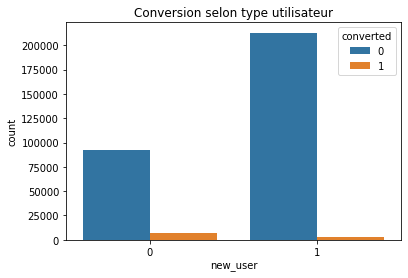

In [ ]:
ax = sns.countplot(x="new_user", hue="converted", data=new_df)
ax.set_title("Conversion selon type utilisateur")
plt.show()

In [ ]:
new_df["converted"].value_counts()

0    304851
1     10193
Name: converted, dtype: int64

# **Dummification**

In [ ]:
new_df["country"] = new_df["country"].astype("category")
new_df["new_user"] = new_df["new_user"].astype("category")
new_df["source"] = new_df["source"].astype("category")
new_df["converted"] = new_df["converted"].astype("category")

In [ ]:
df2 = pd.get_dummies(new_df, columns=["country","source"])

In [ ]:
df2.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [ ]:
df2 = df2[["country_China", "country_Germany", "country_UK", "country_US", "age", "new_user", "source_Ads", "source_Direct", "source_Seo", "total_pages_visited", "converted"]]

In [ ]:
df2.head()

,country_China,country_Germany,country_UK,country_US,age,new_user,source_Ads,source_Direct,source_Seo,total_pages_visited,converted
0,0,0,1,0,25,1,1,0,0,1,0
1,0,0,0,1,23,1,0,0,1,5,0
2,0,0,0,1,28,1,0,0,1,4,0
3,1,0,0,0,39,1,0,0,1,5,0
4,0,0,0,1,30,1,0,0,1,6,0


# **Splitting, oversampling and scaling**

In [ ]:
X = pd.DataFrame(df2.iloc[:,:-1])
y = pd.DataFrame(df2.iloc[:,-1:])

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_reshape = pd.concat([X_train, y_train], axis=1)

converted=X_reshape[X_reshape['converted']==1]
not_converted=X_reshape[X_reshape['converted']==0]

converted_upsampled = resample(converted,
                          replace=True, # sample with replacement
                          n_samples=len(not_converted), # match number in majority class
                          random_state=27) # reproducible results

upsampled = pd.concat([not_converted, converted_upsampled])

data_cond=(upsampled['converted']==1)

data=upsampled[data_cond]

print(len(data))
print(len(upsampled))
X_train=pd.DataFrame(upsampled.iloc[:,:-1])
y_train=pd.DataFrame(upsampled.iloc[:,-1])

243881
487762


In [ ]:
X_train.head()

,country_China,country_Germany,country_UK,country_US,age,new_user,source_Ads,source_Direct,source_Seo,total_pages_visited
19936,0,0,0,1,22,1,0,1,0,9
137903,0,0,0,1,35,1,0,1,0,11
246627,0,0,0,1,30,1,1,0,0,1
163509,0,0,0,1,38,1,0,0,1,3
66624,0,0,0,1,22,1,0,0,1,6


In [ ]:
X_train.shape

(487762, 10)

In [ ]:
y_train.shape

(487762, 1)

In [ ]:
y_train["converted"].value_counts()

1    243881
0    243881
Name: converted, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model training 1 Regression Logistique**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(X_train, y_train)

0.9409958135320095

In [ ]:
logreg.score(X_test, y_test)

0.9428176927105651

In [ ]:
y_pred=logreg.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     60970
           1       0.35      0.93      0.51      2039

    accuracy                           0.94     63009
   macro avg       0.68      0.94      0.74     63009
weighted avg       0.98      0.94      0.95     63009



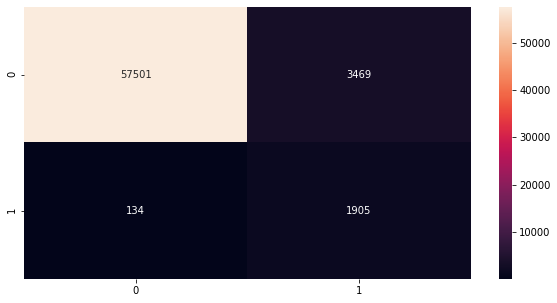

In [ ]:
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d")

# **Model training 2 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [ ]:
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [ ]:
clf.score(X_train,y_train)

0.9383859341236095

In [ ]:
clf.score(X_test,y_test)

0.9295180053643131

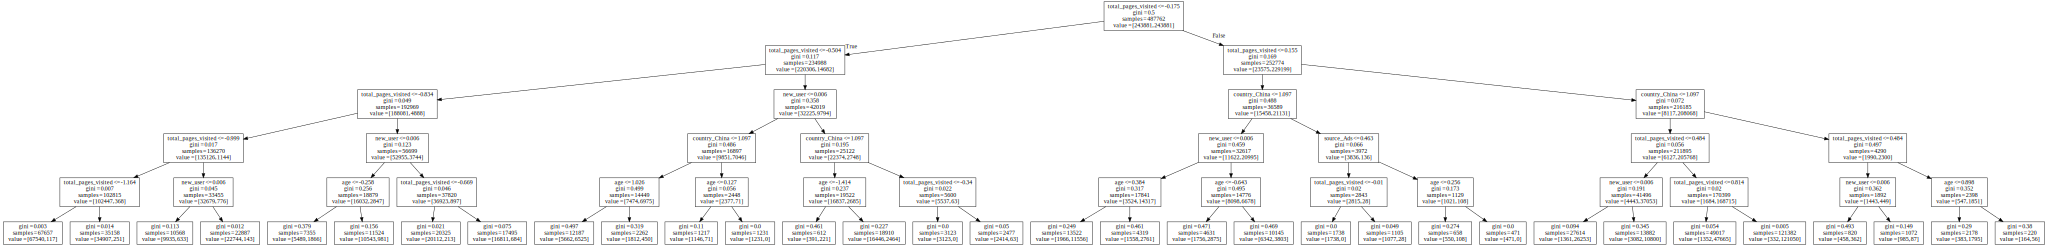

In [ ]:
dot_data = export_graphviz(clf, out_file=None, feature_names= X.columns)
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     60970
           1       0.31      0.94      0.46      2039

    accuracy                           0.93     63009
   macro avg       0.65      0.94      0.71     63009
weighted avg       0.98      0.93      0.95     63009



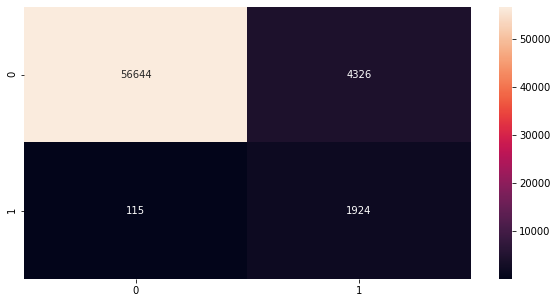

In [ ]:
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
feature_importance = pd.DataFrame({"features": df2.columns[:-1], "score": clf.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance

,features,score
9,total_pages_visited,0.940588
0,country_China,0.026205
5,new_user,0.025183
4,age,0.007965
6,source_Ads,0.000060
1,country_Germany,0.000000
2,country_UK,0.000000
3,country_US,0.000000
7,source_Direct,0.000000
8,source_Seo,0.000000


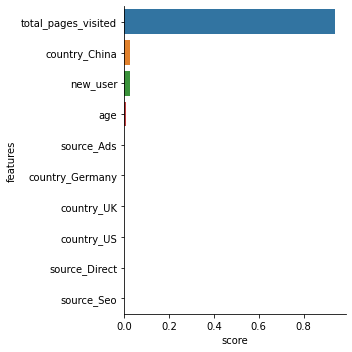

In [ ]:
sns.catplot(x="score",y="features", data=feature_importance, kind="bar" )

#**Modele Training 3 SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
modele = SVC(kernel='rbf')
modele_SVC=modele.fit(X_train,y_train.values.ravel())
y_pred=modele_SVC.predict(X_test)
SVC_score=metrics.accuracy_score(y_test,y_pred)
print(SVC_score)

0.9431351076830294


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     60970
           1       0.36      0.93      0.52      2039

    accuracy                           0.94     63009
   macro avg       0.68      0.94      0.74     63009
weighted avg       0.98      0.94      0.96     63009



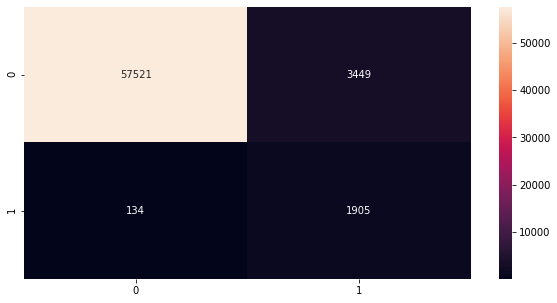

In [ ]:
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d")

# **Model Training 4 Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_50 = RandomForestClassifier(n_estimators=50)
rf_50_fit = rf_50.fit(X_train, y_train.values.ravel())

In [ ]:
rf_50.score(X_train, y_train)

0.9608292568916807

In [ ]:
rf_50.score(X_test, y_test)

0.9437381961307115

In [ ]:
y_pred = rf_50.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     60970
           1       0.35      0.85      0.50      2039

    accuracy                           0.94     63009
   macro avg       0.67      0.90      0.73     63009
weighted avg       0.97      0.94      0.95     63009



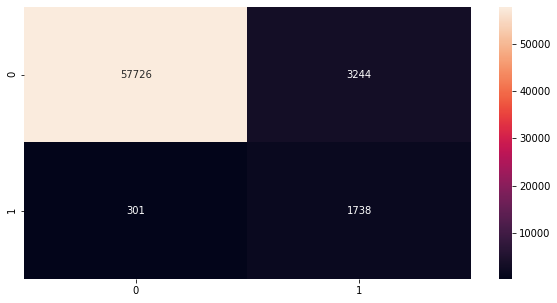

In [ ]:
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#Random Forest avec 20 arbres de décision

rf_20 = RandomForestClassifier(n_estimators=20)
rf_20_fit = rf_20.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
rf_20.score(X_train, y_train)

0.9607985041885182

In [ ]:
rf_20.score(X_test, y_test)

0.9438651621196972

In [ ]:
y_pred = rf_20.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     60970
           1       0.35      0.85      0.50      2039

    accuracy                           0.94     63009
   macro avg       0.67      0.90      0.73     63009
weighted avg       0.97      0.94      0.95     63009



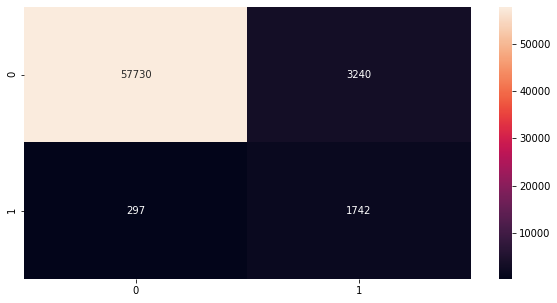

In [ ]:
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
feature_importance2 = pd.DataFrame({"features": df2.columns[:-1], "score": rf_50.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance2

,features,score
9,total_pages_visited,0.743309
5,new_user,0.100097
4,age,0.077358
0,country_China,0.058505
2,country_UK,0.006824
3,country_US,0.005138
1,country_Germany,0.004884
7,source_Direct,0.001329
6,source_Ads,0.001287
8,source_Seo,0.001268


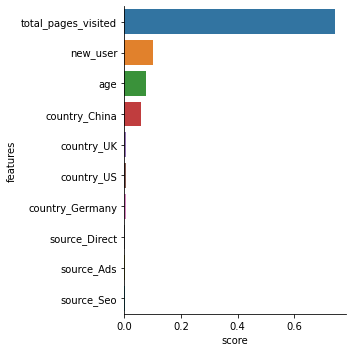

In [ ]:
sns.catplot(x="score",y="features", data=feature_importance2, kind="bar")

In [ ]:
feature_importance3 = pd.DataFrame({"features": df2.columns[:-1], "score": rf_20.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance3

,features,score
9,total_pages_visited,0.742010
5,new_user,0.088475
0,country_China,0.081275
4,age,0.074101
2,country_UK,0.004422
3,country_US,0.003876
1,country_Germany,0.001798
8,source_Seo,0.001422
6,source_Ads,0.001370
7,source_Direct,0.001251


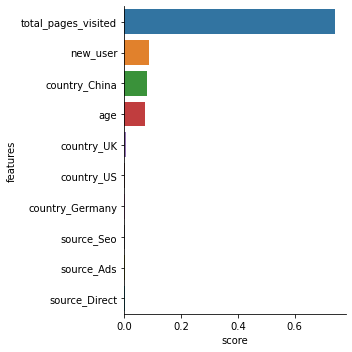

In [ ]:
sns.catplot(x="score",y="features", data=feature_importance3, kind="bar" )

# **Recommendations for the marketing team**

Best model so far : SVM if we're looking the f1-score. 3449 false-positive, 1905 true positive. 


*  Find a way to convert new users

*  Encourage chinese netizens in particular to convert, targeted campaign (we need to understand why chinese netizens convert less than others : different behaviour, different approach ?)

* Encourage younger netizens to convert, targeted campaign 

* Improve user experience in the website navigation

* Retain users who already came with targeted campaigns